In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import scale, robust_scale

In [2]:
df = pd.read_csv(
            'final_STC_dataset2.csv',
            parse_dates=['date_'],
            dtype={ 
                'user_id_maped': np.uint16, # Unsigned integer (0 to 65535)
                'program_id': str,
                'program_name': str,
                'original_name': str,
                'program_class': 'category',
                'season': np.uint8, # Unsigned integer (0 to 255)
                'episode': np.uint16, # Unsigned integer (0 to 65535)
                'program_desc': str,
                'program_genre': 'category',
                'series_title': bool,
                'hd': bool, 
                'title': str,
                'duration_minutes': np.float32,
                'total_runtime': np.float32,
                'user_rating': np.float32,
                'avg_rating': np.float32,
                'content_rating': 'category',
                'age_group': 'category'
            })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926174 entries, 0 to 3926173
Data columns (total 19 columns):
date_               datetime64[ns]
user_id_maped       uint16
program_id          object
program_name        object
original_name       object
program_class       category
season              uint8
episode             uint16
program_desc        object
program_genre       category
series_title        bool
hd                  bool
title               object
duration_minutes    float32
total_runtime       float32
user_rating         float32
avg_rating          float32
content_rating      category
age_group           category
dtypes: bool(2), category(4), datetime64[ns](1), float32(4), object(5), uint16(2), uint8(1)
memory usage: 280.8+ MB


In [3]:
df.head()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,series_title,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group
0,2017-08-16,6928,M0009670,The Boss Baby,The Boss Baby,MOVIE,0,0,Animation MovieThe Boss Baby (HD),Animation,False,True,The Boss Baby,0.280000,96.940002,1.5,6.1,TV-Y,2-6
1,2017-05-27,26138,M0005792SD,100 Streets,100 Streets,MOVIE,0,0,Drama Movie100 Streets,Drama,False,False,100 Streets,0.670000,92.940002,1.5,6.2,TV-14,+14
2,2017-09-16,19082,S000805901001,Heroes Reborn Brave New World,Heroes Reborn,SERIES/EPISODES,1,1,Drama MovieBrave New World (HD),Drama,False,False,Heroes Reborn,28.200001,60.000000,4.7,6.7,TV-14,+14
3,2017-05-21,7946,M0004410,Moana,Moana,MOVIE,0,0,Animation MovieMoana (HD),Animation,False,True,Moana,0.280000,107.059998,1.5,7.3,PG,+8
4,2017-08-10,7418,M0005895,The Mermaid Princess,The Mermaid Princess,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,False,True,The Mermaid Princess,0.130000,77.000000,1.5,4.4,PG,+8


In [4]:
data = df

In [5]:
cluster_df = df.filter(['age_group','program_genre'])

In [6]:
cluster_df.head()

,age_group,program_genre
0,2-6,Animation
1,+14,Drama
2,+14,Drama
3,+8,Animation
4,+8,Animation


In [7]:
##Building the Model
from sklearn.cluster import KMeans
wcss=[]

In [8]:
test_df = cluster_df
# Get dummies
cluster_df = pd.get_dummies(test_df, prefix_sep='_', drop_first=True)
cluster_df.head()
print('Shape:', cluster_df.shape)

Shape: (3926174, 19)


In [9]:
cluster_df.head()


,age_group_+17,age_group_+7,age_group_+8,age_group_2-6,age_group_All ages,age_group_Not Rated,program_genre_Adventure,program_genre_Animation,program_genre_Biography,program_genre_Comedy,program_genre_Crime,program_genre_Documentary,program_genre_Drama,program_genre_Family,program_genre_Horror,program_genre_Romance,program_genre_Sci-Fi,program_genre_Thriller,program_genre_Wrestling
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#get max # of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)

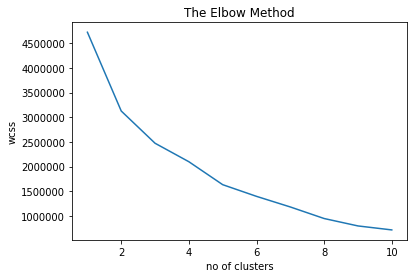

In [11]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
new_cluster = cluster_df

In [13]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0).fit(cluster_df)

In [15]:
cluster_labels = kmeansmodel.labels_

In [16]:
cluster_df['label'] = cluster_labels

In [17]:
#Create a cluster label column in the original DataFrame
new_df = data.assign(Cluster = cluster_labels)

In [18]:
#calculate avg and size for each cluster

new_df.groupby(['Cluster']).agg(['mean']).round(0)



,user_id_maped,season,episode,series_title,hd,duration_minutes,total_runtime,user_rating,avg_rating
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,
0,16958.0,1.0,6.0,0.0,0.0,19.0,119.0,3.0,6.0
1,17581.0,2.0,10.0,0.0,0.0,13.0,80.0,5.0,6.0
2,17077.0,1.0,2.0,0.0,0.0,17.0,112.0,3.0,6.0


In [28]:
new_df.groupby(['Cluster']).count()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,series_title,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group
Cluster,,,,,,,,,,,,,,,,,,,
0,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310,1535310
1,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171,1529171
2,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693,861693


In [103]:
#cluster_avg = new_df.groupby(['Cluster']).mean()
#cluster_avg

In [30]:
#observation in each cluster
new_df['Cluster'].value_counts()

0    1535310
1    1529171
2     861693
Name: Cluster, dtype: int64

In [56]:
# Plot the results
new_df.head()

,date_,user_id_maped,program_id,program_name,original_name,program_class,season,episode,program_desc,program_genre,series_title,hd,title,duration_minutes,total_runtime,user_rating,avg_rating,content_rating,age_group,Cluster
0,2017-08-16,6928,M0009670,The Boss Baby,The Boss Baby,MOVIE,0,0,Animation MovieThe Boss Baby (HD),Animation,False,True,The Boss Baby,0.280000,96.940002,1.5,6.1,TV-Y,2-6,1
1,2017-05-27,26138,M0005792SD,100 Streets,100 Streets,MOVIE,0,0,Drama Movie100 Streets,Drama,False,False,100 Streets,0.670000,92.940002,1.5,6.2,TV-14,+14,0
2,2017-09-16,19082,S000805901001,Heroes Reborn Brave New World,Heroes Reborn,SERIES/EPISODES,1,1,Drama MovieBrave New World (HD),Drama,False,False,Heroes Reborn,28.200001,60.000000,4.7,6.7,TV-14,+14,0
3,2017-05-21,7946,M0004410,Moana,Moana,MOVIE,0,0,Animation MovieMoana (HD),Animation,False,True,Moana,0.280000,107.059998,1.5,7.3,PG,+8,1
4,2017-08-10,7418,M0005895,The Mermaid Princess,The Mermaid Princess,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,False,True,The Mermaid Princess,0.130000,77.000000,1.5,4.4,PG,+8,1


## Visulaizations

### Cluster 1

In [74]:
#Visualizing for clusters 
#Cluster 1
cluster1 = new_df.loc[new_df['Cluster'] == 0]

In [81]:
#age Group

age_range = pd.DataFrame(cluster1.age_group.value_counts()).reset_index()
age_range.columns = ['age_group', 'count']
age_range = age_range.sort_values(['count'], ascending=False)

age_range.head()

,age_group,count
0,+14,1084719
1,+8,300640
2,All ages,147856
3,+7,1188
4,Not Rated,489


Text(0.5, 1.0, 'Cluster 1: Group Ages of users')

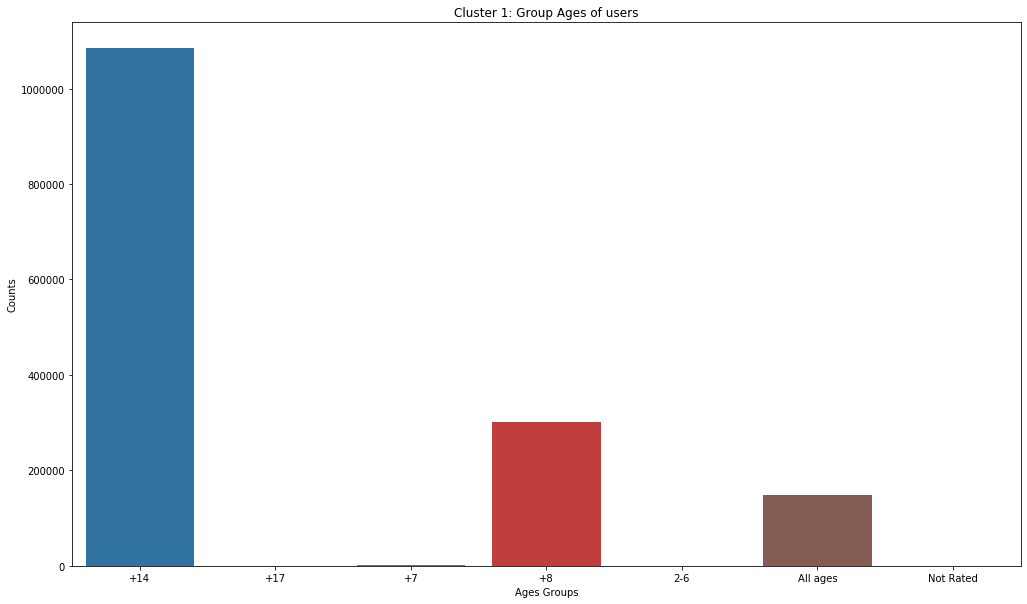

In [83]:
#Age Visulaization cluster 1 
plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'age_group', y = 'count',
            data = age_range)
ax.set(xlabel='Ages Groups', ylabel='Counts')
plt.title('Cluster 1: Group Ages of users')

In [85]:
#Genres

genres = pd.DataFrame(cluster1.program_genre.value_counts()).reset_index()
genres.columns = ['program_genre', 'count']
genres = genres.sort_values(['count'], ascending=False)

genres.head()

,program_genre,count
0,Drama,450581
1,Action,432473
2,Comedy,410541
3,Family,103125
4,Documentary,54083


Text(0.5, 1.0, 'Cluster 1: Most Watched Genres By users')

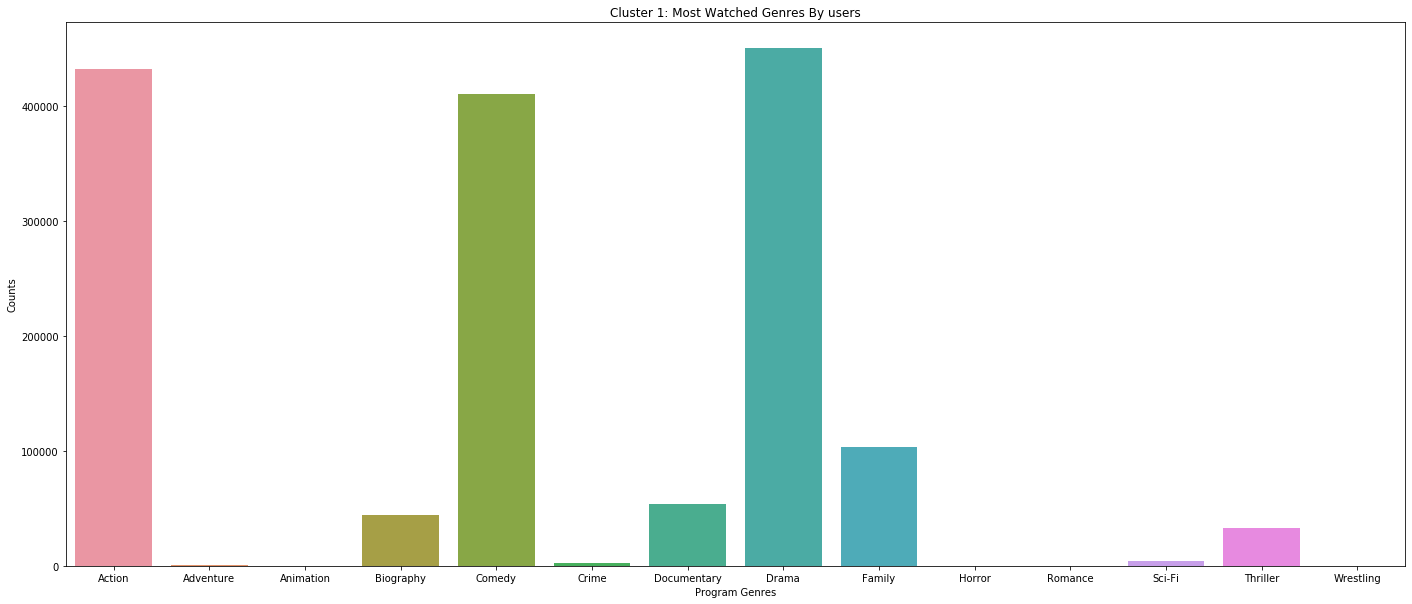

In [86]:
plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'program_genre', y = 'count',
            data = genres)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 1: Most Watched Genres By users')

Text(0.5, 1.0, 'Cluster 1: Programs Rating')

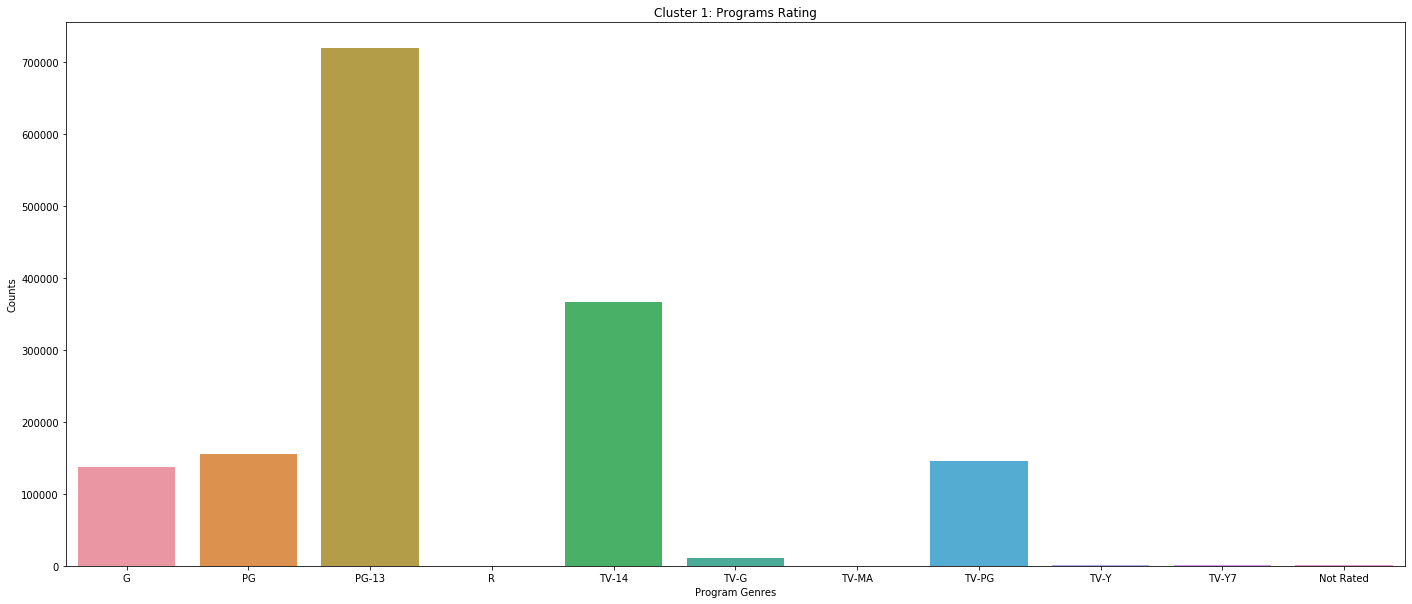

In [102]:
#Content Rating

content_rating_df1 = pd.DataFrame(cluster1.content_rating.value_counts()).reset_index()
content_rating_df1.columns = ['content_rating', 'count']
content_rating_df1 = content_rating_df1.sort_values(['count'], ascending=False)

content_rating_df.head()

plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'content_rating', y = 'count',
            data = content_rating_df1)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 1: Programs Rating')

### Cluster 2

In [87]:
##Cluster 2
cluster2 = new_df.loc[new_df['Cluster'] == 1]

In [88]:
#age Group

age_range2 = pd.DataFrame(cluster2.age_group.value_counts()).reset_index()
age_range2.columns = ['age_group', 'count']
age_range2 = age_range2.sort_values(['count'], ascending=False)

age_range2.head()

,age_group,count
0,2-6,1030153
1,+8,303837
2,All ages,102340
3,+7,68955
4,+14,23846


Text(0.5, 1.0, 'Cluster 2: Group Ages of users')

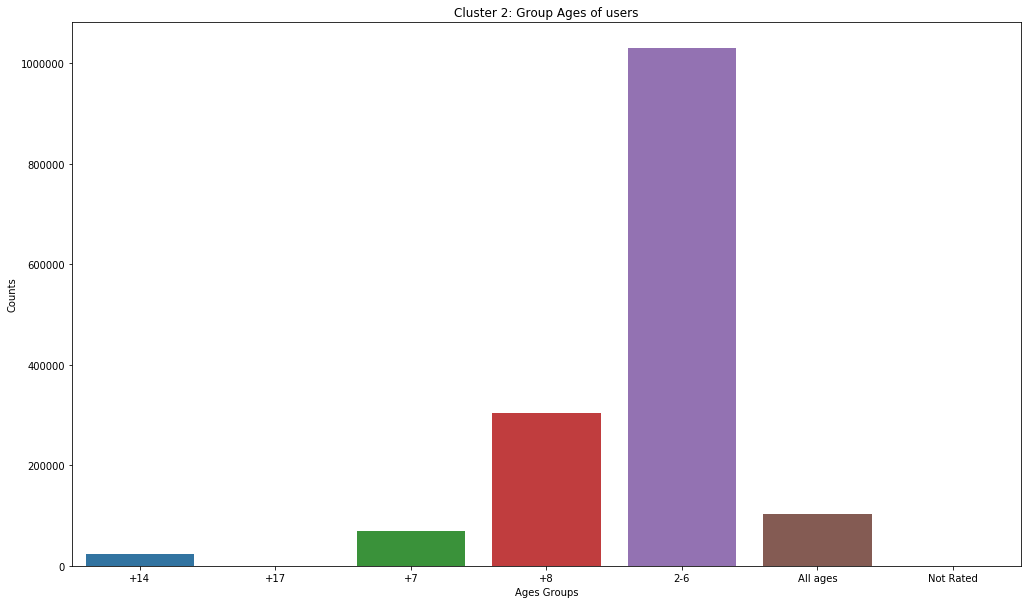

In [89]:
#Age Visulaization cluster 2

plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'age_group', y = 'count',
            data = age_range2)
ax.set(xlabel='Ages Groups', ylabel='Counts')
plt.title('Cluster 2: Group Ages of users')

In [90]:
#Genres

genres2 = pd.DataFrame(cluster2.program_genre.value_counts()).reset_index()
genres2.columns = ['program_genre', 'count']
genres2 = genres2.sort_values(['count'], ascending=False)

genres2.head()

,program_genre,count
0,Animation,1528682
1,Action,489
2,Wrestling,0
3,Thriller,0
4,Sci-Fi,0


Text(0.5, 1.0, 'Cluster 1: Most Watched Genres By users')

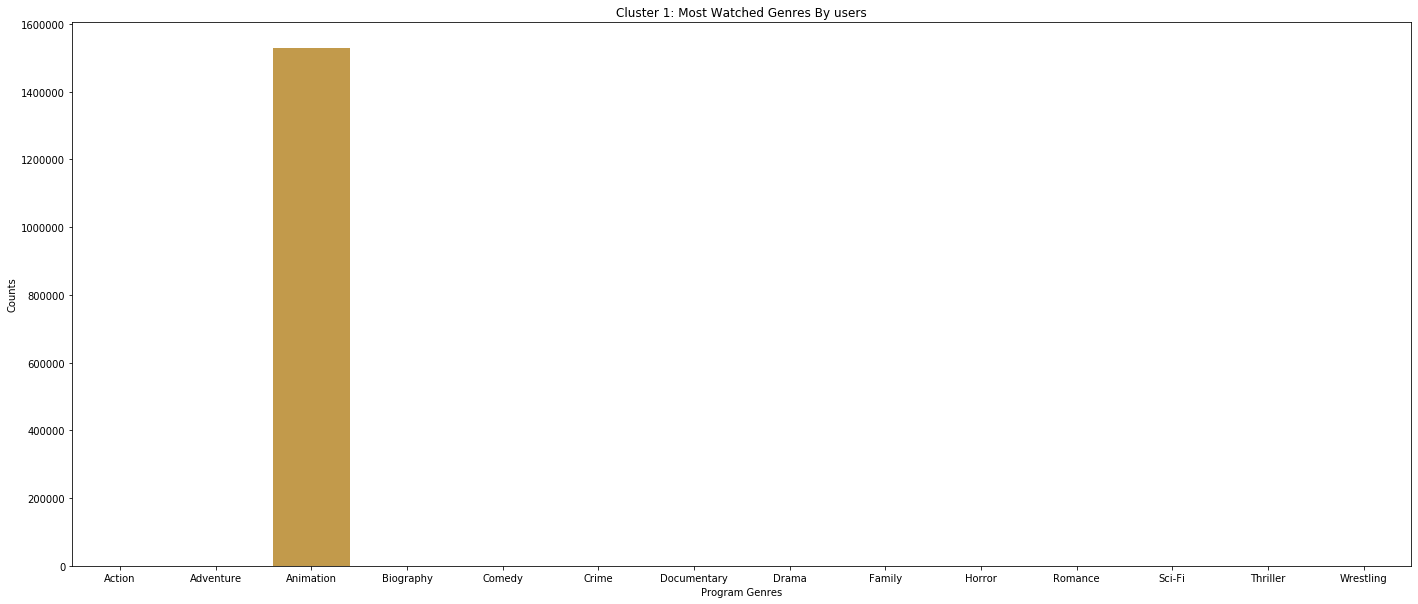

In [92]:
plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'program_genre', y = 'count',
            data = genres2)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 1: Most Watched Genres By users')

Text(0.5, 1.0, 'Cluster 2: Programs Rating')

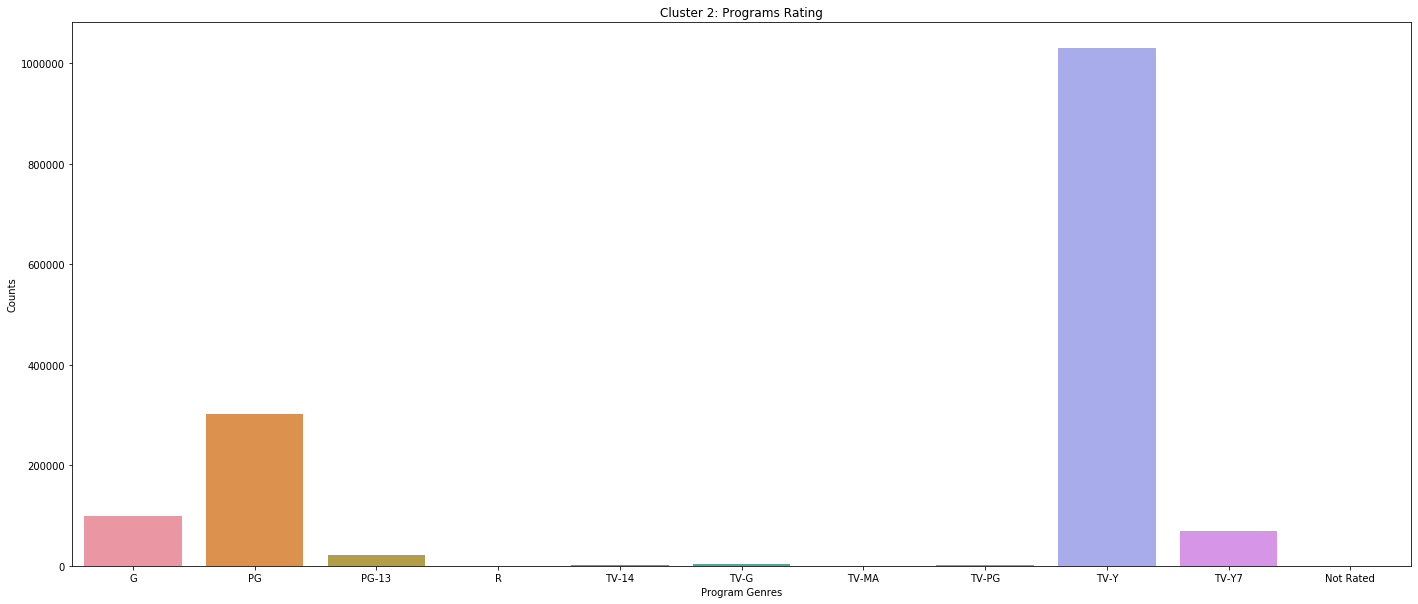

In [101]:
#Content Rating

content_rating_df2 = pd.DataFrame(cluster2.content_rating.value_counts()).reset_index()
content_rating_df2.columns = ['content_rating', 'count']
content_rating_df2 = content_rating_df2.sort_values(['count'], ascending=False)

content_rating_df.head()

plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'content_rating', y = 'count',
            data = content_rating_df2)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 2: Programs Rating')

Text(0.5, 1.0, 'Cluster 2: Programs Classes')

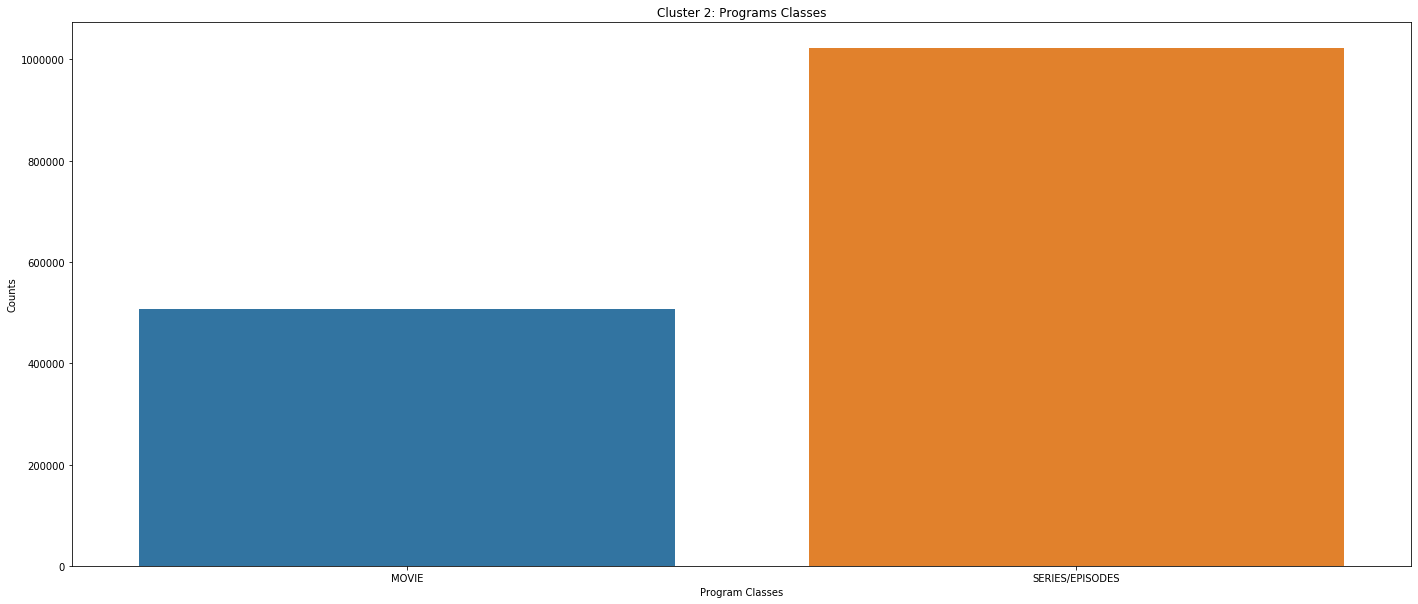

In [129]:
#Movies VS Series

movies_df1 = pd.DataFrame(cluster2.program_class.value_counts()).reset_index()
movies_df1.columns = ['program_class', 'count']
movies_df1 = movies_df1.sort_values(['count'], ascending=False)

plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'program_class', y = 'count',
            data = movies_df1)
ax.set(xlabel='Program Classes', ylabel='Counts')
plt.title('Cluster 2: Programs Classes')

### Cluster 3

In [93]:
##Cluster 3
cluster3 = new_df.loc[new_df['Cluster'] == 2]

In [94]:
#age Group

age_range3 = pd.DataFrame(cluster3.age_group.value_counts()).reset_index()
age_range3.columns = ['age_group', 'count']
age_range3 = age_range3.sort_values(['count'], ascending=False)

age_range3.head()

,age_group,count
0,+17,861693
1,Not Rated,0
2,All ages,0
3,2-6,0
4,+8,0


Text(0.5, 1.0, 'Cluster 3: Group Ages of users')

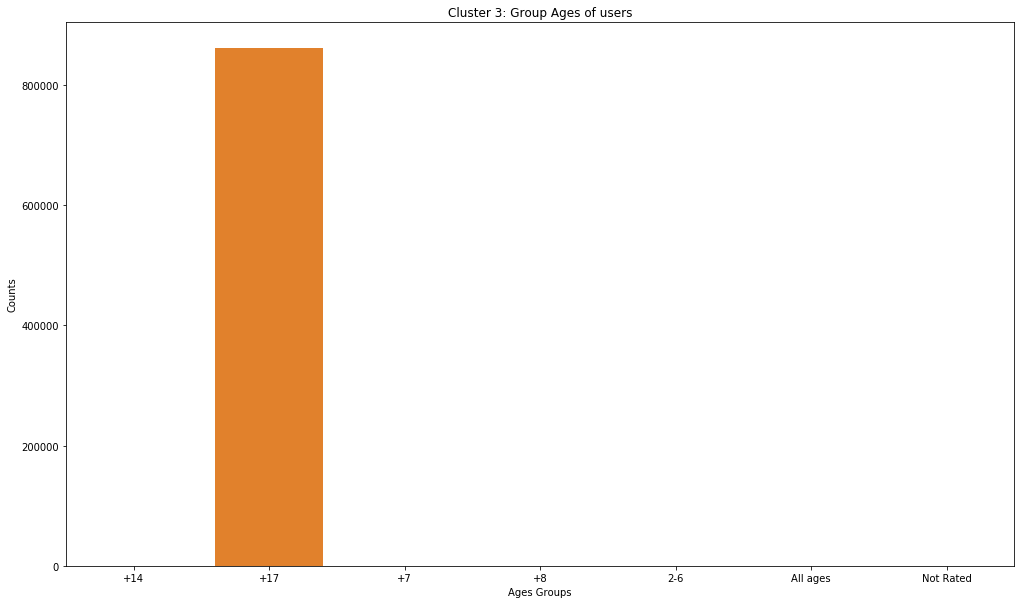

In [95]:
#Age Visulaization cluster 3

plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'age_group', y = 'count',
            data = age_range3)
ax.set(xlabel='Ages Groups', ylabel='Counts')
plt.title('Cluster 3: Group Ages of users')

In [96]:
#Genres

genres3 = pd.DataFrame(cluster3.program_genre.value_counts()).reset_index()
genres3.columns = ['program_genre', 'count']
genres3 = genres3.sort_values(['count'], ascending=False)

genres3.head()

,program_genre,count
0,Horror,240099
1,Action,239432
2,Drama,147576
3,Thriller,116950
4,Comedy,94973


Text(0.5, 1.0, 'Cluster 3: Most Watched Genres By users')

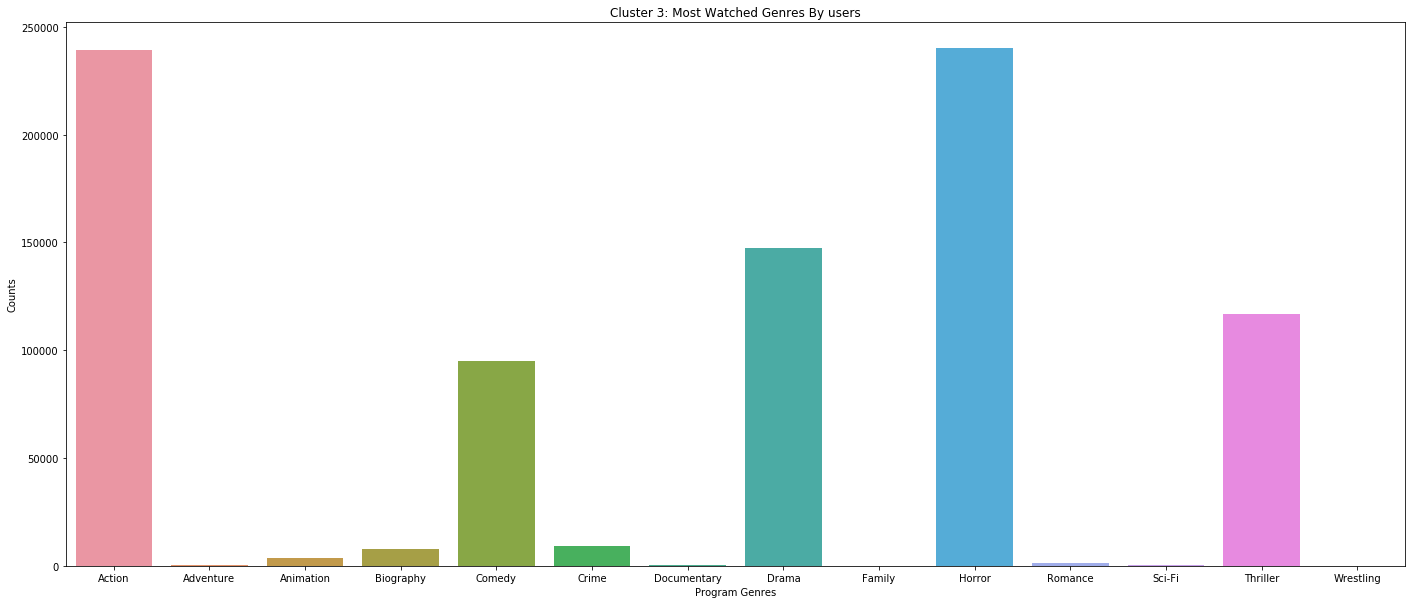

In [98]:
plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'program_genre', y = 'count',
            data = genres3)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 3: Most Watched Genres By users')

In [99]:
#Content Rating

content_rating_df = pd.DataFrame(cluster3.content_rating.value_counts()).reset_index()
content_rating_df.columns = ['content_rating', 'count']
content_rating_df = content_rating_df.sort_values(['count'], ascending=False)

content_rating_df.head()

,content_rating,count
0,R,701317
1,TV-MA,160376
2,Not Rated,0
3,TV-Y7,0
4,TV-Y,0


Text(0.5, 1.0, 'Cluster 3: Programs Rating')

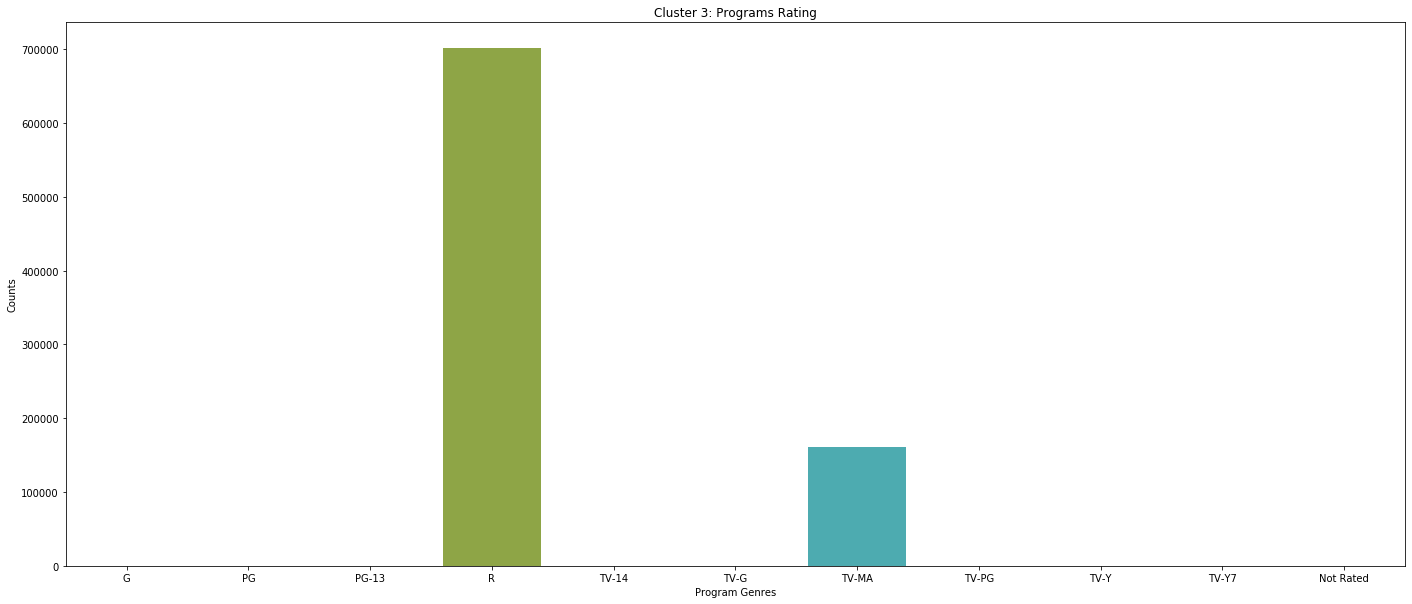

In [100]:
plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'content_rating', y = 'count',
            data = content_rating_df)
ax.set(xlabel='Program Genres', ylabel='Counts')
plt.title('Cluster 3: Programs Rating')

Text(0.5, 1.0, 'Cluster 3: Programs Classes')

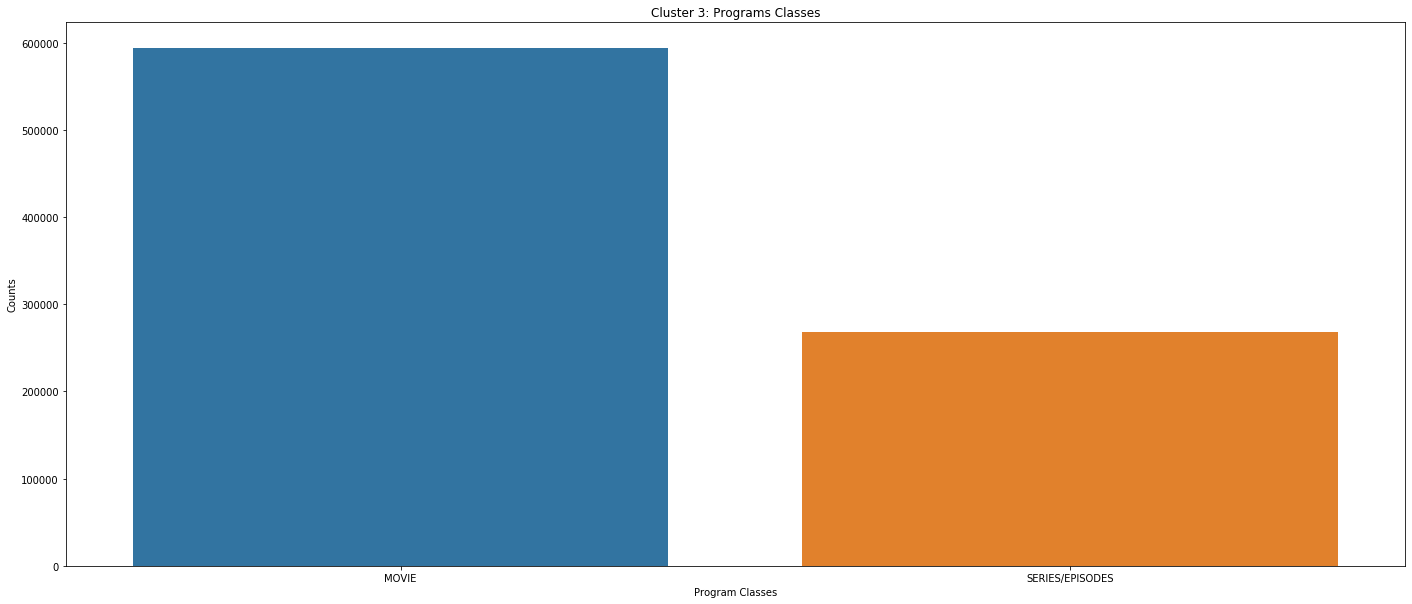

In [128]:
#Movies VS Series

movies_df = pd.DataFrame(cluster3.program_class.value_counts()).reset_index()
movies_df.columns = ['program_class', 'count']
movies_df = movies_df.sort_values(['count'], ascending=False)

plt.figure(figsize=(24, 10))
ax = sns.barplot(x = 'program_class', y = 'count',
            data = movies_df)
ax.set(xlabel='Program Classes', ylabel='Counts')
plt.title('Cluster 3: Programs Classes')

In [107]:
# Test Profiling for each user

new_df.loc[new_df['user_id_maped'] == 116, "Cluster"].value_counts()

0    714
2    462
1     77
Name: Cluster, dtype: int64

In [108]:
new_df.loc[new_df['user_id_maped'] == 11663, "Cluster"].value_counts()

1    301
0    203
2     34
Name: Cluster, dtype: int64

In [109]:
new_df.loc[new_df['user_id_maped'] == 16648, "Cluster"].value_counts()

0    720
2    622
1     56
Name: Cluster, dtype: int64

In [110]:
new_df.loc[new_df['user_id_maped'] == 25401, "Cluster"].value_counts()

Series([], Name: Cluster, dtype: int64)

In [133]:
new_df.loc[new_df['user_id_maped'] == 25401, "Cluster"].value_counts()

#seems like this user ID is not available in our data

Series([], Name: Cluster, dtype: int64)

In [111]:
new_df.loc[new_df['user_id_maped'] == 25713, "Cluster"].value_counts()

1    795
0    367
2    144
Name: Cluster, dtype: int64

In [112]:
new_df.loc[new_df['user_id_maped'] == 26782, "Cluster"].value_counts()

2    1232
0    1149
1     540
Name: Cluster, dtype: int64

In [113]:
new_df.loc[new_df['user_id_maped'] == 27085, "Cluster"].value_counts()

2    455
0    386
1    289
Name: Cluster, dtype: int64

In [114]:
new_df.loc[new_df['user_id_maped'] == 30336, "Cluster"].value_counts()

1    815
0    232
2    174
Name: Cluster, dtype: int64

In [117]:
new_df.loc[new_df['user_id_maped'] == 32108, "Cluster"].value_counts()

2    2200
0     993
1     971
Name: Cluster, dtype: int64

In [130]:
new_df.loc[new_df['user_id_maped'] == 30336, "Cluster"].value_counts()

1    815
0    232
2    174
Name: Cluster, dtype: int64

## seems that most users have multiple users. Like for one family and shared between family members. Cluster  1 encoded as 0 users more closer to teens to young Adults. cluster 2 encoded as 1 users are closer to Kids. Cluster 3 encoded as 2 users are more likely young adults to adults.